### Data Research: CoinMarketCap
Research and data analysis using the CoinMarketCap API to obtain different metrics of the best valued cryptocurrencies on the market.

Documentation: https://coinmarketcap.com/api/documentation/v1/

In [9]:
from requests import  Session
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#take enviroment variables from .env file.
load_dotenv()
CMC_PRO_API_KEY = os.getenv('api')

base_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
params = {
  'start':'1',
  'limit': '100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': CMC_PRO_API_KEY,
}

session = Session()
session.headers.update(headers)
response = session.get(base_url, params=params, headers=headers)
data = response.json()

In [ ]:
#Data Searcher function
def dataSearcher(data, response, *args):
    if response.status_code == 200:
        user_input = input("Enter the crypto names separated by commas: ")
        crypto_symbols = [symbol.strip() for symbol in user_input.split(',')]
        for crypto_symbol in crypto_symbols:
            found = False
            for cryptocurrency in data["data"]:
                if cryptocurrency["symbol"] == crypto_symbol:
                    found = True
                    output_str = ""
                    for arg in args:
                        if arg == "name":
                            output_str += f"{cryptocurrency['name']} "
                        elif arg == "symbol":
                            output_str += f"({cryptocurrency['symbol']}) "
                        elif arg == "cmc_rank":
                            output_str += f"#{cryptocurrency['cmc_rank']}. "
                        elif arg == "price":
                            price = cryptocurrency['quote']['USD']['price']
                            # Formatted price for 2 decimal places
                            formatted_price = "{:.2f}".format(float(price))
                            output_str += f"Price: ${formatted_price} "
                        elif arg == "market_cap":
                            market_cap = cryptocurrency['quote']['USD']['market_cap']
                            formated_market_cap = "{:.2f}".format(float(market_cap))
                            output_str += f"\nMarket Cap: ${formated_market_cap}"
                        elif arg == "volume_24h":
                            volume_24h = cryptocurrency['quote']['USD']['volume_24h']
                            formated_volume_24h = "{:.2f}".format(float(volume_24h))
                            output_str += f"\nVolume 24h: ${formated_volume_24h}"
                        elif arg == "percent_change_24h":
                            output_str += f"\nPercent Change 24h: {cryptocurrency['quote']['USD']['percent_change_24h']}%"
                    print(output_str, end="\n --------------------------------------\n")
                    break
            if not found:
                print(f"No cryptocurrency found with the symbol: '{crypto_symbol}'")
    else:
        print("Status Error")

#Data Visualizer function
def dataVisualizer(data, response, *args):
    if response.status_code == 200:
        cryptocurrency_data = [] # List to store crypto data
        user_input = input("Enter the crypto symbols separated by commas: ")
        crypto_symbols = [symbol.strip() for symbol in user_input.split(',')]
        for crypto_symbol in crypto_symbols:
            found = False
            for cryptocurrency in data["data"]:
                if cryptocurrency['symbol'] == crypto_symbol:
                    found = True
                    output_data = {} # Dict to store crypto data
                    for arg in args:
                        if arg == "name":
                            output_data["Name"] = cryptocurrency['name']
                        elif arg == "symbol":
                            output_data["Symbol"] = cryptocurrency['symbol']
                        elif arg == "cmc_rank":
                            output_data["CMC Rank"] = cryptocurrency['cmc_rank']
                        elif arg == "price":
                            price = cryptocurrency['quote']['USD']['price']
                            formatted_price = float("{:.2f}".format(float(price)))
                            output_data["Price"] = formatted_price
                        elif arg == "market_cap":
                            output_data["Market Cap"] = cryptocurrency['quote']['USD']['market_cap']
                        elif arg == "volume_24h":
                            output_data["Volume 24h"] = cryptocurrency['quote']['USD']['volume_24h']
                        elif arg == "percent_change_24h":
                            output_data["Percent Change 24h"] = cryptocurrency['quote']['USD']['percent_change_24h']
                        elif arg == 'percent_change_7d':
                            output_data["Percent Change 7 Days"] = cryptocurrency['quote']['USD']['percent_change_7d']
                    cryptocurrency_data.append(output_data) # Agregamos los datos de la criptomoneda al diccionario
            if not found:
                print(f"No cryptocurrency found with the symbol: '{crypto_symbol}'")
        
        # Create a DataFrame using pandas after procesing all cryptocurrecy symbols
        cryptocurrency_df = pd.DataFrame(cryptocurrency_data)
        return cryptocurrency_df
    else:
        print("Status Error")

### Cryptocurrency Rank

In [10]:
dataSearcher(data, response, "cmc_rank", "name", "symbol")

#1. Bitcoin (BTC) 
 --------------------------------------
#5. Solana (SOL) 
 --------------------------------------
#2. Ethereum (ETH) 
 --------------------------------------


### Market Capitalization, Negotiation Volume an Price Changes in last 24h.


In [26]:
dataSearcher(data, response, "name", "symbol", "price", "market_cap", "percent_change_24h")

Bitcoin (BTC) Price: $51657.35 
Market Cap: $1014259469578.40
Percent Change 24h: -0.38558285%
 --------------------------------------
Solana (SOL) Price: $104.38 
Market Cap: $46029392092.63
Percent Change 24h: -2.04138412%
 --------------------------------------


### Market Capitalization and Percent Change in the last 7 Days

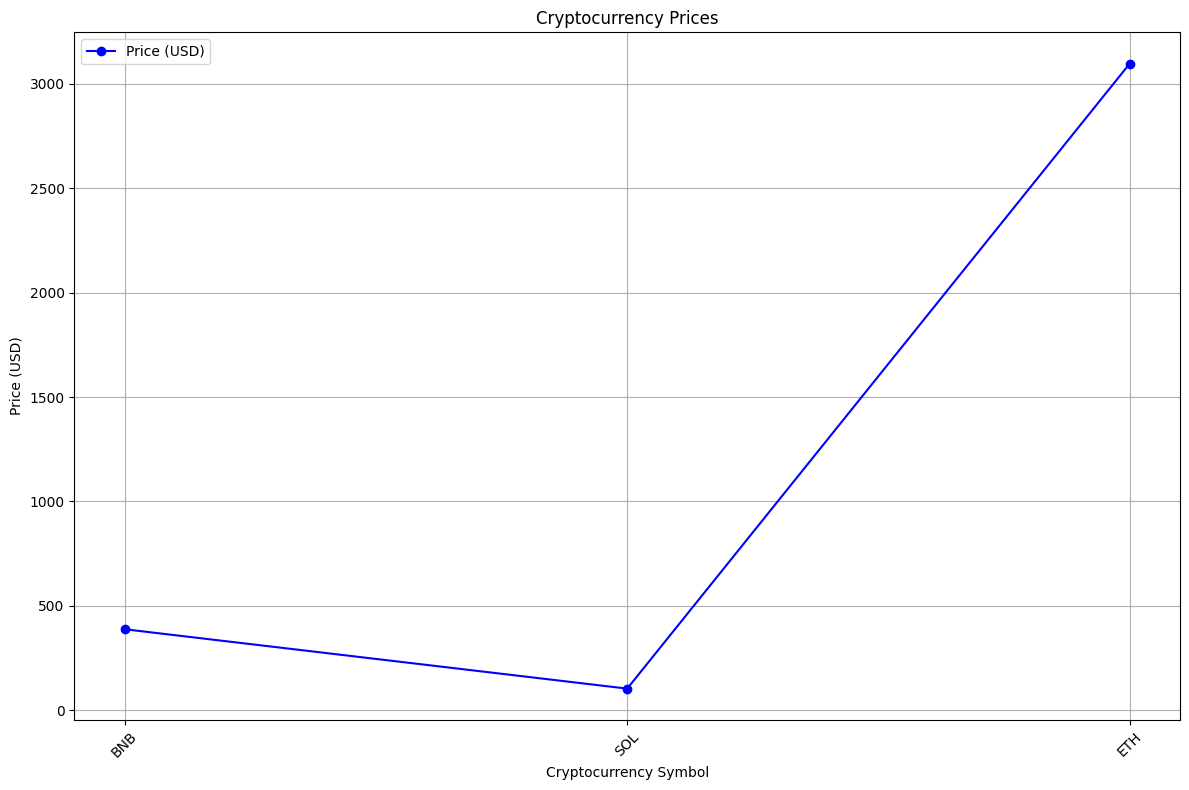

In [30]:
crypto_data = dataVisualizer(data, response, 'symbol', 'price', 'percent_change_24h')


plt.figure(figsize=(12, 8))
plt.plot(crypto_data['Symbol'], crypto_data['Price'], marker='o', color='blue', label='Price (USD)')
plt.xlabel('Cryptocurrency Symbol')
plt.ylabel('Price (USD)')
plt.title('Cryptocurrency Prices')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


### Cryptocurrencies Price Comparision

<Axes: xlabel='Name', ylabel='Price'>

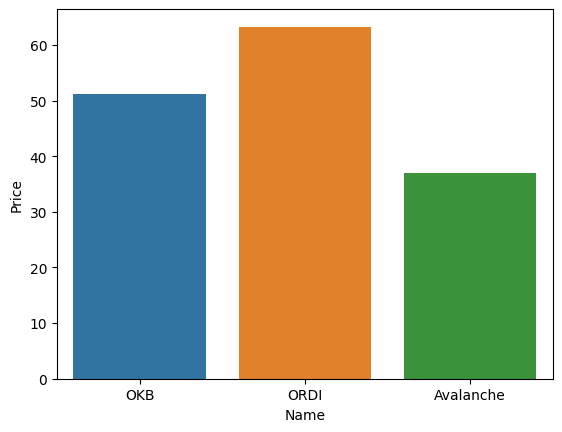

In [4]:
crypto_df = dataVisualizer(data, response, "name", "price")
sns.barplot(data=crypto_df, x="Name", y="Price")